# 011. Pandas 를 이용한 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-colorblind")
np.random.seed(123)

## DataFrame.plot

In [2]:
df = pd.DataFrame({"A": np.random.randn(365).cumsum(),
                             "B": np.random.randn(365).cumsum() + 20,
                             "C": np.random.randn(365).cumsum() - 20},
                          index=pd.date_range('1/1/2021', periods=365))
                  
df.head()

,A,B,C
2021-01-01,-1.085631,20.059291,-20.230904
2021-01-02,-0.088285,21.803332,-16.659325
2021-01-03,0.194693,20.835588,-17.055481
2021-01-04,-1.311601,21.255156,-17.093802
2021-01-05,-1.890202,21.462083,-19.518638


<AxesSubplot:>

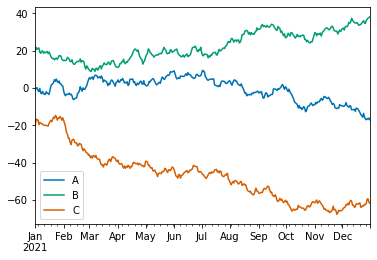

In [3]:
df.plot()

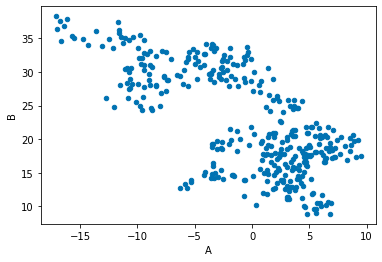

In [4]:
df.plot('A', 'B', kind='scatter');

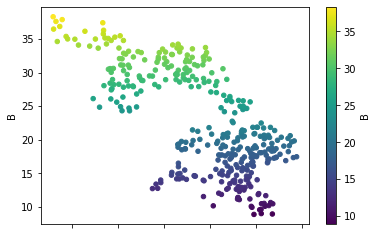

In [5]:
df.plot.scatter('A', 'B', c='B', colormap='viridis');

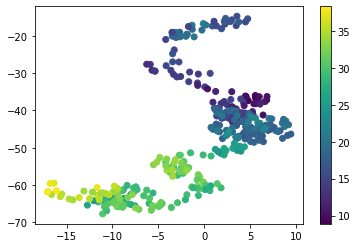

In [6]:
plt.scatter(df.A, df.C, c=df.B, cmap='viridis')
plt.colorbar()

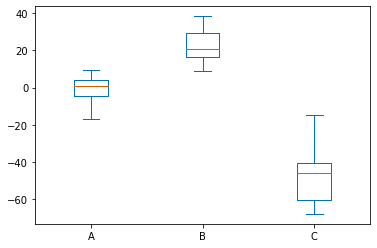

In [7]:
df.plot.box();

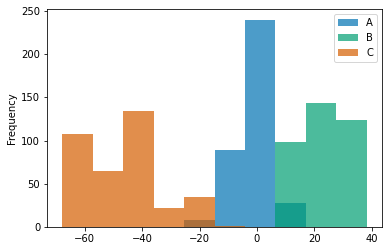

In [8]:
df.plot.hist(alpha=0.7);

가우스 커널을 사용하여 커널 밀도 추정 플롯 생성

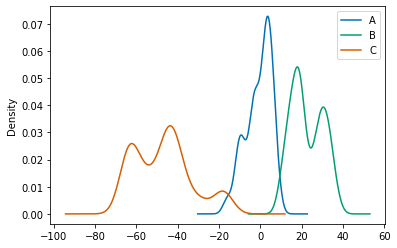

In [9]:
df.plot.kde();

## The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml).

이 데이터 세트에는 목적지 국가에서 기록한 국제 이민자의 흐름에 대한 연간 데이터가 포함되어 있습니다. 자료는 출생지, 시민권 또는 외국인과 국민 모두를위한 이전 / 다음 거주지에 따라 유입과 유출을 모두 나타냅니다. 현재 버전은 45 개국에 관한 데이터를 제공합니다.

이 실습에서는 캐나다 이민 데이터에 중점을 둘 것입니다.

In [10]:
# !pip install openpyxl

In [11]:
import pandas as pd
import matplotlib.patches as mpatches # needed for waffle Charts

df_can = pd.read_excel('data/Canada.xlsx', engine='openpyxl',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df_can.head(3)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [12]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [13]:
# 데이터 세트를 정리하여 불필요한 열(예 : REG)을 제거
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [14]:
# 이해하기 쉽게 열 이름을 변경합니다.
df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [15]:
# 일관성을 위해 모든 열 레이블을 문자열 유형으로 만듭니다.
df_can.columns = [str(col) for col in df_can.columns]
df_can.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [16]:
# 국가 이름을 색인으로 설정하면 .loc 메소드를 사용하여 국가를 빠르게 찾는 데 유용합니다.
df_can.set_index('Country', inplace=True)
# 이 노트북에서 사용할 연도 - 나중에 플로팅하는 데 유용합니다.
years = [str(y) for y in range(1980, 2014)]

In [17]:
condition = df_can['Continent'] == 'Asia'
condition = (df_can['Continent'] == 'Asia') & (df_can['Region'] == 'Southern Asia')

In [18]:
df_can.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013'],
      dtype='object')

In [19]:
# add total column
df_can['Total'] = df_can.iloc[:, 3:].sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [20]:
df_can.shape

(195, 38)

## Series or DataFrame 의 plotting

- X 축 : index value   

- Y 축 : 해당 index 의 value

- plot 의 kind

    * `line` (default)
    * `bar` : vertical bar plots
    * `barh` :  horizontal bar plots
    * `hist` : histogram
    * `box` : boxplot
    * `kde` or `density` : density plots
    * `area` : area plots
    * `pie` : pie plots
    * `scatter` : scatter plots
    * `hexbin` : hexbin plot

### Line Pots (Series/Dataframe) 

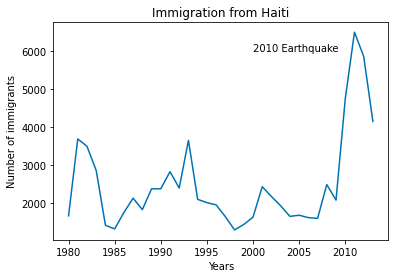

In [21]:
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column

haiti.index = haiti.index.map(int)
haiti.plot(kind='line')

ax = plt.gca()
ax.set_xlabel('Years')
ax.set_ylabel('Number of immigrants')
ax.set_title('Immigration from Haiti');
ax.text(2000, 6000, '2010 Earthquake');

### 다른 나라들 간의 이민자 수 비교를 위해 그래프에 더 많은 국가 추가 

- 1980 년부터 2013 년까지 인도와 중국 이민자 수를 비교

Step 1: China 와 India 를 dataframe 에서 따로 추출하여 plot 한다

In [22]:
df_ci = df_can.loc[['China', 'India'], years]
df_ci

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


* *pandas*는 x 축의 인덱스와 y 축의 개별 라인으로의 열을 그려준다. `df_ci`는`country`를 인덱스로,`years`를 컬럼으로하는 데이터 프레임이기 때문에 행과 열을 바꾸기 위해 먼저`transpose ()`메소드를 사용하여 데이터 프레임을 변경한다.

In [23]:
df_ci = df_ci.transpose()

#플로팅을 위해 df_ci의 인덱스 값을 정수 유형으로 변경
df_ci.index = df_ci.index.map(int) 
df_ci.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


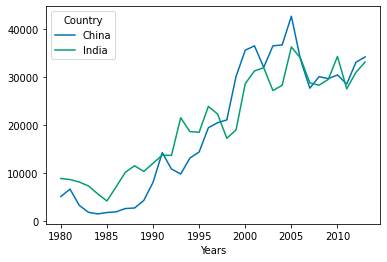

In [24]:
df_ci.plot(kind='line')
plt.xticks(df_ci.index[::5])   # 5 년 단위 xtick
plt.xlabel('Years')
plt.show()

### 캐나다 이민에 가장 많은 기여를 한 상위 5 개국의 추세를 비교

In [25]:
# pd.set_option('display.max_row', None)
top5 = df_can.loc[:, years].sum(axis=1).sort_values(ascending=False)
top5

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
                                                         ...  
San Marino                                                   5
New Caledonia                                                5
Marshall Islands                                             2
Western Sahara                                               2
Palau                                                        1
Length: 195, dtype: int64

In [26]:
df_top5 = df_can.loc[
    ['India', 'China', 'United Kingdom of Great Britain and Northern Ireland', 'Philippines', 'Pakistan'], 
    years]
df_top5 = df_top5.transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [27]:
df_top5.index

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

- 상위 5 개의 인덱스 값을 정수형으로 변경하여 플로팅

In [28]:
df_top5.index = df_top5.index.map(int) 
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Text(0, 0.5, 'Number of Immigrants')

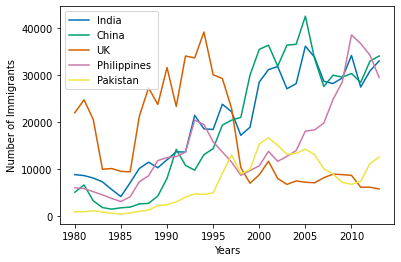

In [29]:
df_top5.plot(kind='line')
ax = plt.gca()
ax.legend(['India', 'China', 'UK', 'Philippines ', 'Pakistan'])
ax.set_xticks(df_top5.index[::5])
ax.set_xlabel('Years');
ax.set_ylabel('Number of Immigrants')

## Histogram

- 발생 빈도 비교

<AxesSubplot:ylabel='Frequency'>

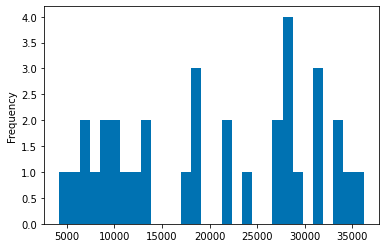

In [30]:
df_top5['India'].plot(kind='hist', bins=30)

## Bar Chart

In [31]:
df_iceland = df_can.loc['Iceland', years]

Text(0, 0.5, 'Number of Immigrants')

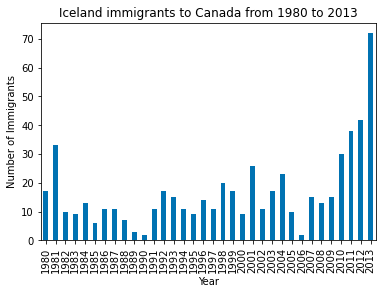

In [32]:
df_iceland.plot(kind='bar')

plt.title('Iceland immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

### 같은 plot 에 여러개의 histogram 겹쳐 그리기

### 1980 년부터 2013 년까지 Denmark, Norway, Sweden 의 Canada 이민자 분포

In [33]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


Text(0.5, 0, 'Number of Immigrants')

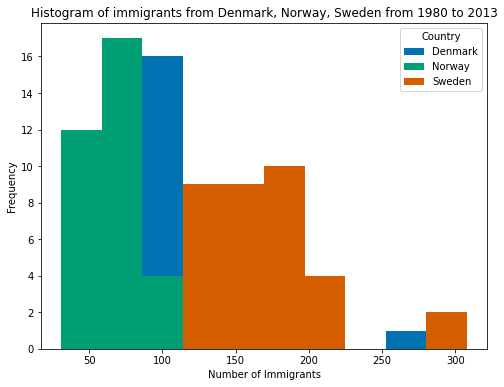

In [34]:
df_t.plot(kind='hist', figsize=(8, 6))

plt.title('Histogram of immigrants from Denmark, Norway, Sweden from 1980 to 2013')
plt.xlabel('Number of Immigrants')

### 위의 plot 을 보기 좋게 조정

- np.histogram(array, bin) --> histogram 값, bin edge 반환

In [35]:
count, bin_edges = np.histogram(df_t, 15)
count, bin_edges

(array([ 5, 13, 21, 14,  9, 10,  5,  9,  7,  3,  1,  0,  0,  2,  3],
       dtype=int64),
 array([ 31.        ,  49.46666667,  67.93333333,  86.4       ,
        104.86666667, 123.33333333, 141.8       , 160.26666667,
        178.73333333, 197.2       , 215.66666667, 234.13333333,
        252.6       , 271.06666667, 289.53333333, 308.        ]))

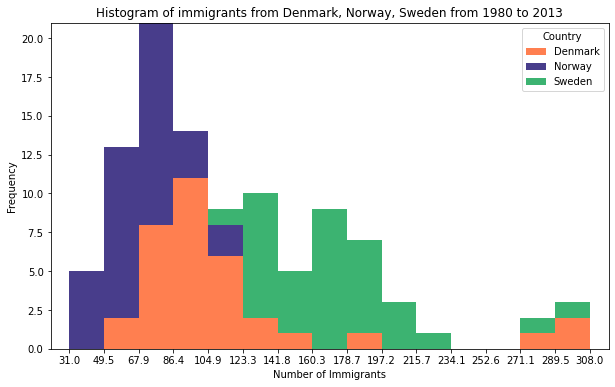

In [36]:
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10

df_t.plot(kind='hist', figsize=(10, 6), 
             bins=15, 
             xticks=bin_edges,
             color=['coral', 'darkslateblue', 'mediumseagreen'], 
             stacked=True, 
             xlim=(xmin, xmax)
             )

plt.title('Histogram of immigrants from Denmark, Norway, Sweden from 1980 to 2013')
plt.xlabel('Number of Immigrants')
plt.show()

## Bar Chart + 주석 달기

- 그룹화된 범주형 변수의 크기를 표시

- kind='bar' : 세로막대  
- kind='barh' : 가로막대

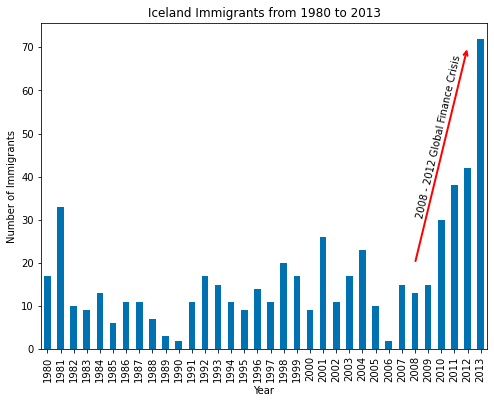

In [37]:
df_iceland.plot(kind='bar', figsize=(8, 6))

plt.title('Iceland Immigrants from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')

#화살표 그리기
plt.annotate('',                      # 표시할 text
                   xy=(32, 70),       #  화살표의 머리 위치
                   xytext=(28, 20),   # 화살표의 꼬리 위치
                   arrowprops=dict(arrowstyle='->', color='red', lw=2)
            )
#글씨 쓰기
plt.annotate('2008 - 2012 Global Finance Crisis',      # 표시할 text
                  xy=(28, 30),                   # text 시작 위치
                  rotation=77,                   # trial and error 로 맞춤
                  va='bottom',                   # text 가 vertically bottom 정렬
                  ha='left'                      # text 가 horizontally 좌측 정렬
            )
plt.show()

### 가로막대 plot

- 가로로 표시할 경우 길이 제한을 받지 않아 더 실용적일 수 있음

In [38]:
df_top15 = df_can.head(15)
df_top15 = df_top15[years].transpose()

<AxesSubplot:>

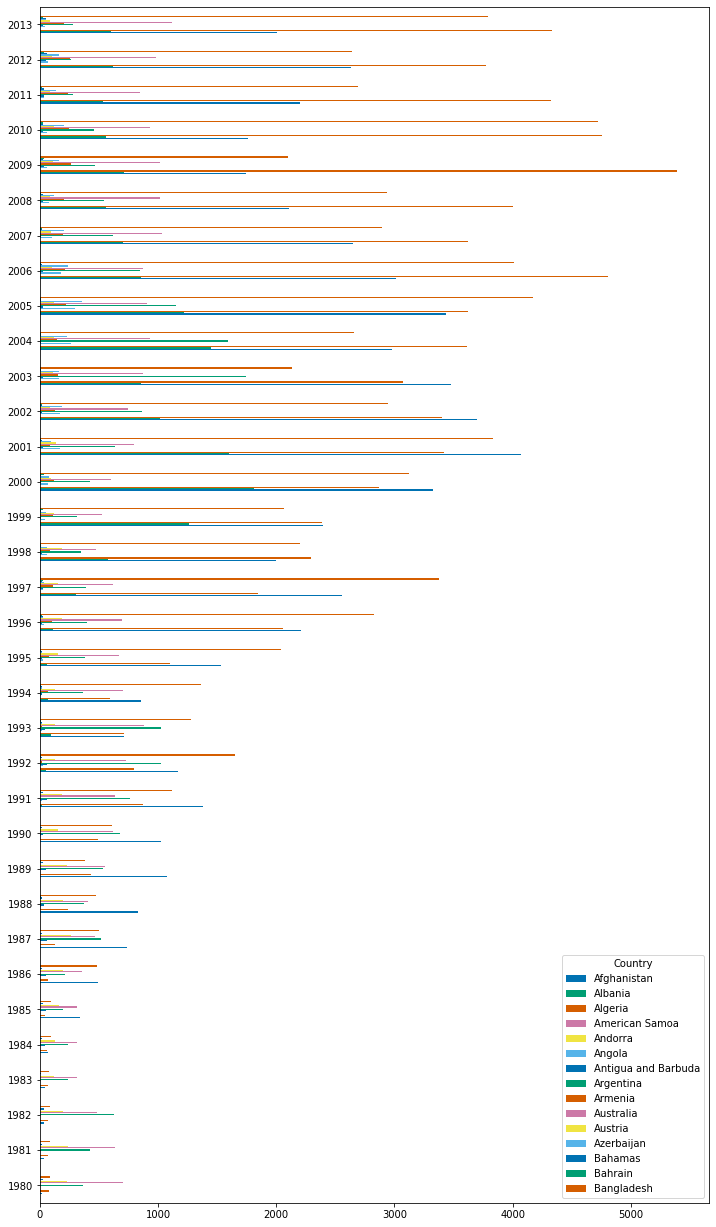

In [39]:
df_top15.plot(kind='barh', figsize=(12, 22))

## Waffle Chart 

- [PyWaffle](https://github.com/ligyxy/PyWaffle) 를 이용한 waffle chart plot  


- matplotlib.pyplot.figure 의 FigureClass parameter 로 지정   


- pip install pywaffle  로 설치


- 사용예
```
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    columns=10, 
    values=[48, 46, 3]
)
```

In [40]:
# !pip install pywaffle

In [41]:
from pywaffle import Waffle

In [42]:
# Waffle Chart 작성을 위해 3 개국만으로 새로운 DataFrame 구성 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


**1 단계 :** 각 국가별 구성 비율 계산

In [43]:
total_values = sum(df_dsn['Total'])

category_proportions = [(value / total_values) for value in df_dsn['Total']]
category_proportions

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]

**2 단계 :**  `waffle` chart 의 size (tile 갯수) 결정

In [44]:
columns = 40 # width of chart
rows = 10      # height of chart

total_num_tiles = columns * rows # total number of tiles

**3단계:** 국가별 tile 수 결정

In [45]:
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
tiles_per_category

[129, 77, 194]

In [46]:
categories = df_dsn.index.values # 국가명
data = {categories[0]: tiles_per_category[0], categories[1]: tiles_per_category[1], categories[2]: tiles_per_category[2]}
data.items()

dict_items([('Denmark', 129), ('Norway', 77), ('Sweden', 194)])

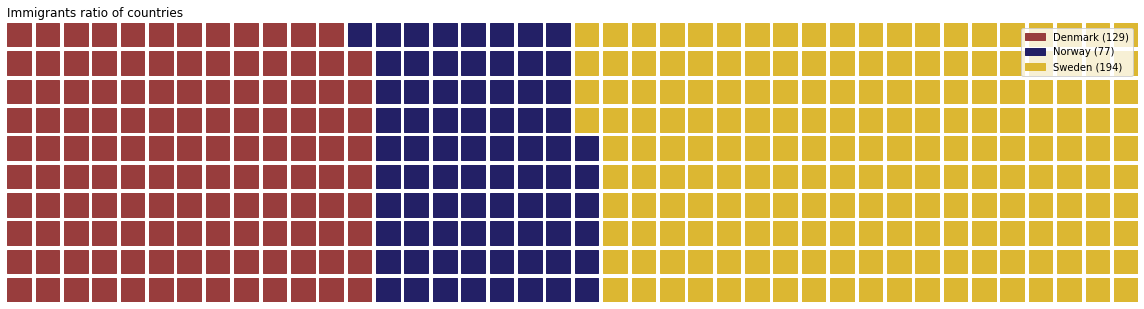

In [51]:
data = {categories[0]: tiles_per_category[0], categories[1]: tiles_per_category[1], categories[2]: tiles_per_category[2]}

fig = plt.figure(
    figsize=(16, 8),
    FigureClass=Waffle, 
    rows=10, 
    columns=40, 
    values=data, 
    colors=("#983D3D", "#232066", "#DCB732"),
    title={'label': 'Immigrants ratio of countries', 'loc': 'left'},
    labels=["{0} ({1})".format(k, v) for k, v in data.items()])

plt.show()